<a href="https://colab.research.google.com/github/Raqueljrp/Dise-o-Experimental/blob/main/202506_DOE_DBGL_FORM5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Diseño de Experimentos 2025**
# **Formato para Trabajar en Colab 2025**
# **Escribe el Nombre del Curso**: Diseno de Experimentos
## **Escribe tu nombre completo**: Raquel Jimena Rey Prada
> Email: rrey@utb.edu.co

> Celular:3006613549

> Código Estudiantil: T00057965
## **TEMA: Diseño en Cuadrados Greco Latinos - DCGL**



<a name="inicio"></a>

## **1.** [Diseno en Cuadrado Greco Latino - DCGL](#T1)
## **2.** [Datos del problema](#T2)
## **3.** [Tabla Anova](#T3)
## **4.** [Turkey Honestly Significant Difference (HSD)](#T4)
## **5.** [Validacion en R](#T5)
## **6.** [Prueba de Homocedasticidad (Levene's Test)](#T6)

[⬆️ Volver al inicio](#inicio)

<a name="T1"></a>
## **1. Diseno en cuadrado greco latino - DCGL**


## Diseño de un Experimento con Cuadrado Grecolatino para la Rapidez de Combustión

Un experimentador busca investigar el efecto de cinco formulaciones diferentes de carga propulsora (A, B, C, D, E) sobre la rapidez de combustión en sistemas de expulsión de tripulación de aviones.

**Factores del Experimento:**

*   **Factor Principal:** Formulaciones de carga propulsora (A, B, C, D, E).
*   **Factores de Bloqueo:**
    *   Lotes de materia prima (1, 2, 3, 4, 5). Cada lote solo permite probar cinco formulaciones.
    *   Operadores (1, 2, 3, 4, 5). Se sospecha que existen diferencias significativas en las habilidades de los operadores.
    *   Montajes de prueba (α, β, γ, δ, ε). Un factor adicional que podría ser importante.

**Diseño Experimental:**

Para controlar los efectos de los factores de bloqueo, se utiliza un diseño de Cuadrado Grecolatino. Este diseño permite probar cada formulación exactamente una vez con cada operador, cada lote de materia prima y cada montaje de prueba.

La siguiente tabla muestra el diseño cuadrado grecolatino resultante, donde cada celda representa una combinación de Operador (fila) y Lote (columna), con la Formulacion (letra mayúscula) y el Montaje de prueba (letra griega) asignados, y el valor observado de la rapidez de combustión:

**Tabla 6. Diseño en Cuadrado Grecolatino**

| (Operador\Lote) | 1     | 2     | 3     | 4     | 5     |
| :-------------- | :---- | :---- | :---- | :---- | :---- |
| 1               | Aα=24 | Bγ=20 | Cε=19 | Dβ=24 | Eδ=24 |
| 2               | Bβ=17 | Cδ=24 | Dα=30 | Eγ=27 | Aε=36 |
| 3               | Cγ=18 | Dε=38 | Eβ=26 | Aδ=27 | Bα=21 |
| 4               | Dδ=26 | Eα=31 | Aγ=26 | Bε=23 | Cβ=22 |
| 5               | Eε=22 | Aβ=30 | Bδ=20 | Cα=29 | Dγ=31 |

[⬆️ Volver al inicio](#inicio)

<a name="T2"></a>
## **2. Datos del Problema**


In [ ]:
import pandas as pd

data = {
    'Operador': [1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5],
    'Lote': [1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5],
    'Formulacion': ['A', 'B', 'C', 'D', 'E', 'B', 'C', 'D', 'E', 'A', 'C', 'D', 'E', 'A', 'B', 'D', 'E', 'A', 'B', 'C', 'E', 'A', 'B', 'C', 'D'],
    'Montaje': ['α', 'γ', 'ε', 'β', 'δ', 'β', 'δ', 'α', 'γ', 'ε', 'γ', 'ε', 'β', 'δ', 'α', 'δ', 'α', 'γ', 'ε', 'β', 'ε', 'β', 'δ', 'α', 'γ'],
    'Rapidez_Combustion': [24, 20, 19, 24, 24, 17, 24, 30, 27, 36, 18, 38, 26, 27, 21, 26, 31, 26, 23, 22, 22, 30, 20, 29, 31]
}

df = pd.DataFrame(data)

# Convert categorical columns to 'category' dtype
df['Operador'] = df['Operador'].astype('category')
df['Lote'] = df['Lote'].astype('category')
df['Formulacion'] = df['Formulacion'].astype('category')
df['Montaje'] = df['Montaje'].astype('category')

display(df)

,Operador,Lote,Formulacion,Montaje,Rapidez_Combustion
0,1,1,A,α,24
1,1,2,B,γ,20
2,1,3,C,ε,19
3,1,4,D,β,24
4,1,5,E,δ,24
5,2,1,B,β,17
6,2,2,C,δ,24
7,2,3,D,α,30
8,2,4,E,γ,27
9,2,5,A,ε,36


[⬆️ Volver al inicio](#inicio)


<a name="T3"></a>
## **3. Tabla Anova**

In [ ]:
%pip install statsmodels

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Perform the ANOVA
model = ols('Rapidez_Combustion ~ C(Operador) + C(Lote) + C(Formulacion) + C(Montaje)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=1)

display(anova_table)

,df,sum_sq,mean_sq,F,PR(>F)
C(Operador),4.0,68.0,17.00,2.060606,0.178311
C(Lote),4.0,150.0,37.50,4.545455,0.032930
C(Formulacion),4.0,330.0,82.50,10.000000,0.003344
C(Montaje),4.0,62.0,15.50,1.878788,0.207641
Residual,8.0,66.0,8.25,NaN,NaN


[⬆️ Volver al inicio](#inicio)


## Interpretación de los Resultados del ANOVA

La tabla ANOVA muestra la variación en la rapidez de combustión atribuida a cada uno de los factores (Operador, Lote, Formulación y Montaje) y la variación residual. Para interpretar los resultados, nos enfocamos en la columna `PR(>F)`, que representa el valor p (p-value). Un valor p menor que un nivel de significancia predeterminado (comúnmente 0.05) indica que el factor tiene un efecto estadísticamente significativo en la variable de respuesta (Rapidez de Combustión).

Basado en la tabla ANOVA:

*   **C(Operador):** El valor p es 0.178311. Como este valor es mayor que 0.05, concluimos que no hay evidencia estadísticamente significativa para afirmar que existen diferencias en la rapidez de combustión entre los diferentes operadores.
*   **C(Lote):** El valor p es 0.032930. Como este valor es menor que 0.05, concluimos que hay evidencia estadísticamente significativa para afirmar que existen diferencias en la rapidez de combustión entre los diferentes lotes de materia prima.
*   **C(Formulacion):** El valor p es 0.003344. Como este valor es mucho menor que 0.05, concluimos que hay evidencia altamente estadísticamente significativa para afirmar que existen diferencias en la rapidez de combustión entre las diferentes formulaciones de carga propulsora.
*   **C(Montaje):** El valor p es 0.207641. Como este valor es mayor que 0.05, concluimos que no hay evidencia estadísticamente significativa para afirmar que existen diferencias en la rapidez de combustión entre los diferentes montajes de prueba.
*   **Residual:** Esta fila representa la variación no explicada por los factores incluidos en el modelo.

**Conclusión:**

De acuerdo con el análisis ANOVA, la **Formulación de la carga propulsora** y el **Lote de materia prima** tienen un efecto estadísticamente significativo en la rapidez de combustión. El Operador y el Montaje de prueba no parecen tener un efecto significativo en este experimento.

Podríamos proceder a realizar pruebas post-hoc (como la prueba HSD de Tukey) para determinar qué formulaciones específicas o lotes difieren significativamente entre sí, si fuera necesario.

Aquí está la tabla ANOVA de los resultados:

|                 |    df |   sum_sq |   mean_sq |         F |    PR(>F) |
|:----------------|------:|---------:|----------:|----------:|----------:|
| C(Operador)     |     4 |     68   |     17    |  2.060606 |  0.178311 |
| C(Lote)         |     4 |    150   |     37.5  |  4.545455 |  0.032930 |
| C(Formulacion)  |     4 |    330   |     82.5  | 10.000000 |  0.003344 |
| C(Montaje)      |     4 |     62   |     15.5  |  1.878788 |  0.207641 |
| Residual        |     8 |     66   |      8.25 |       NaN |       NaN |

[⬆️ Volver al inicio](#inicio)

<a name="T4"></a>
## **4. Turkey HSD**

## **¿Qué es la Prueba HSD de Tukey y por qué es Importante?**

La prueba de Diferencia Significativa Honesta (HSD) de Tukey es una prueba post-hoc que se utiliza después de realizar un Análisis de Varianza (ANOVA) y encontrar que existe una diferencia estadísticamente significativa entre las medias de tres o más grupos.

**¿Por qué es importante?**

El ANOVA nos dice si al menos una de las medias de los grupos es diferente de las otras, pero no nos dice **cuáles** grupos son diferentes entre sí. La prueba HSD de Tukey compara todas las posibles parejas de medias de grupo para determinar cuáles diferencias son estadísticamente significativas, controlando la tasa de error tipo I (la probabilidad de rechazar una hipótesis nula verdadera) para el conjunto de comparaciones.

En resumen, si el ANOVA indica que hay diferencias significativas, la prueba HSD de Tukey es crucial para identificar las diferencias específicas entre los grupos y obtener conclusiones más detalladas sobre los efectos de los factores estudiados.

### 4.1. Turkey HSD para la variable Operador

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     1      2      4.6  0.683  -5.8348 15.0348  False
     1      3      3.8 0.8097  -6.6348 14.2348  False
     1      4      3.4 0.8632  -7.0348 13.8348  False
     1      5      4.2 0.7489  -6.2348 14.6348  False
     2      3     -0.8 0.9993 -11.2348  9.6348  False
     2      4     -1.2 0.9967 -11.6348  9.2348  False
     2      5     -0.4    1.0 -10.8348 10.0348  False
     3      4     -0.4    1.0 -10.8348 10.0348  False
     3      5      0.4    1.0 -10.0348 10.8348  False
     4      5      0.8 0.9993  -9.6348 11.2348  False
-----------------------------------------------------


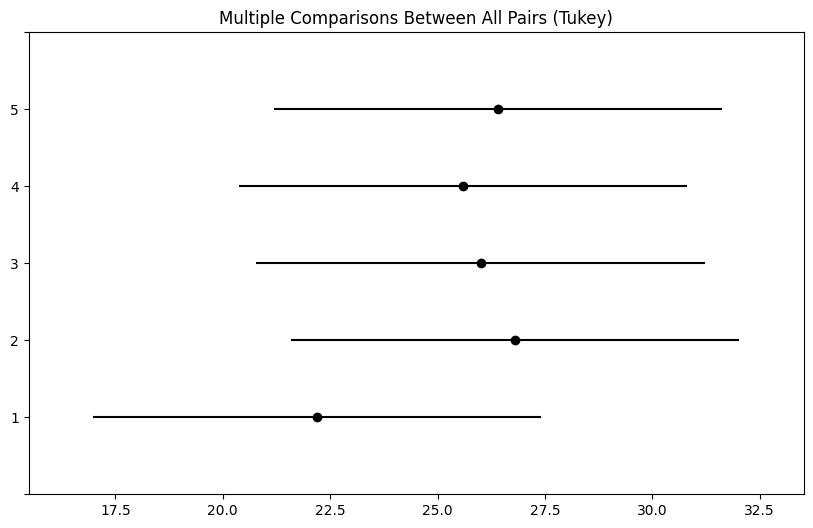

In [26]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

# Perform Tukey HSD test for 'Operador'
tukey_operador = pairwise_tukeyhsd(endog=df['Rapidez_Combustion'], groups=df['Operador'], alpha=0.05)

# Display the results
print(tukey_operador)

# Plot the results
tukey_operador.plot_simultaneous()
plt.show()

### 4.2. Turkey HSD para la variable Lote

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     1      2      7.2 0.2129  -2.5056 16.9056  False
     1      3      2.8 0.9069  -6.9056 12.5056  False
     1      4      4.6 0.6236  -5.1056 14.3056  False
     1      5      5.4 0.4762  -4.3056 15.1056  False
     2      3     -4.4 0.6607 -14.1056  5.3056  False
     2      4     -2.6 0.9271 -12.3056  7.1056  False
     2      5     -1.8   0.98 -11.5056  7.9056  False
     3      4      1.8   0.98  -7.9056 11.5056  False
     3      5      2.6 0.9271  -7.1056 12.3056  False
     4      5      0.8 0.9991  -8.9056 10.5056  False
-----------------------------------------------------


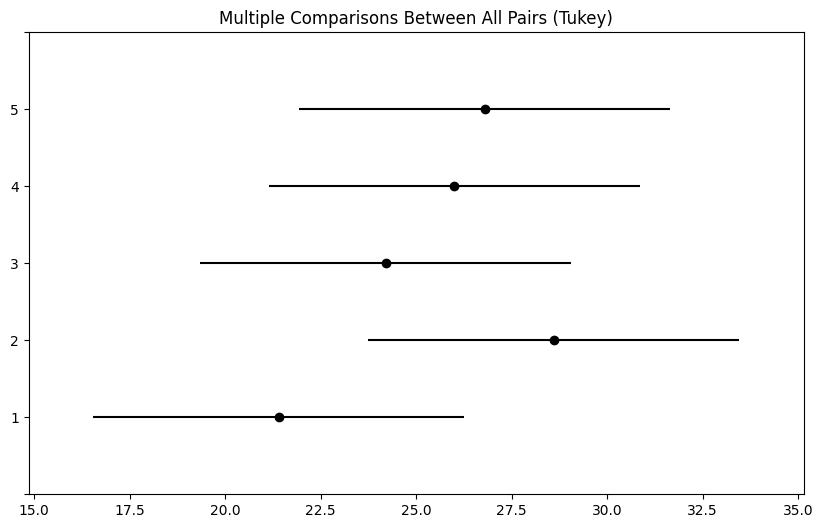

In [27]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

# Perform Tukey HSD test for 'Lote'
tukey_lote = pairwise_tukeyhsd(endog=df['Rapidez_Combustion'], groups=df['Lote'], alpha=0.05)

# Display the results
print(tukey_lote)

# Plot the results
tukey_lote.plot_simultaneous()
plt.show()

### 4.3. Turkey HSD para la variable Formulacion

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     A      B     -8.4 0.0329 -16.2717 -0.5283   True
     A      C     -6.2 0.1685 -14.0717  1.6717  False
     A      D      1.2 0.9904  -6.6717  9.0717  False
     A      E     -2.6 0.8574 -10.4717  5.2717  False
     B      C      2.2 0.9161  -5.6717 10.0717  False
     B      D      9.6 0.0123   1.7283 17.4717   True
     B      E      5.8 0.2182  -2.0717 13.6717  False
     C      D      7.4 0.0717  -0.4717 15.2717  False
     C      E      3.6 0.6536  -4.2717 11.4717  False
     D      E     -3.8 0.6077 -11.6717  4.0717  False
-----------------------------------------------------


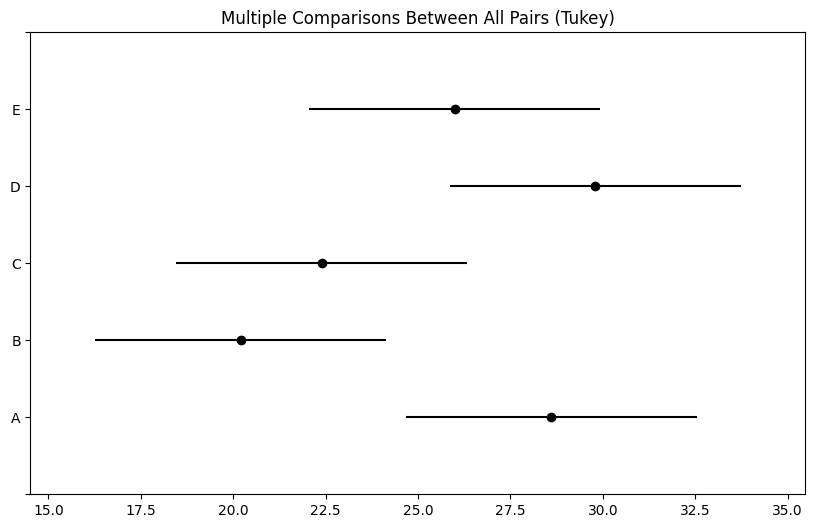

In [28]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

# Perform Tukey HSD test for 'Formulacion'
tukey_formulacion = pairwise_tukeyhsd(endog=df['Rapidez_Combustion'], groups=df['Formulacion'], alpha=0.05)

# Display the results
print(tukey_formulacion)

# Plot the results
tukey_formulacion.plot_simultaneous()
plt.show()

## Interpretación de la Prueba HSD de Tukey para la variable Formulacion

Para interpretar los resultados de la prueba HSD de Tukey, nos fijamos en la columna `reject`. Si el valor en esta columna es `True`, significa que la diferencia entre las medias de los dos grupos comparados es estadísticamente significativa al nivel de significancia especificado (alpha = 0.05). Si el valor es `False`, la diferencia no es estadísticamente significativa.

Observando los resultados de la prueba HSD de Tukey para la variable `Formulacion`:

### 4.4. Turkey HSD para la variable Montaje

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     α      β     -3.2 0.8885 -13.6861  7.2861  False
     α      γ     -2.6 0.9439 -13.0861  7.8861  False
     α      δ     -2.8 0.9278 -13.2861  7.6861  False
     α      ε      0.6 0.9998  -9.8861 11.0861  False
     β      γ      0.6 0.9998  -9.8861 11.0861  False
     β      δ      0.4    1.0 -10.0861 10.8861  False
     β      ε      3.8 0.8123  -6.6861 14.2861  False
     γ      δ     -0.2    1.0 -10.6861 10.2861  False
     γ      ε      3.2 0.8885  -7.2861 13.6861  False
     δ      ε      3.4 0.8653  -7.0861 13.8861  False
-----------------------------------------------------


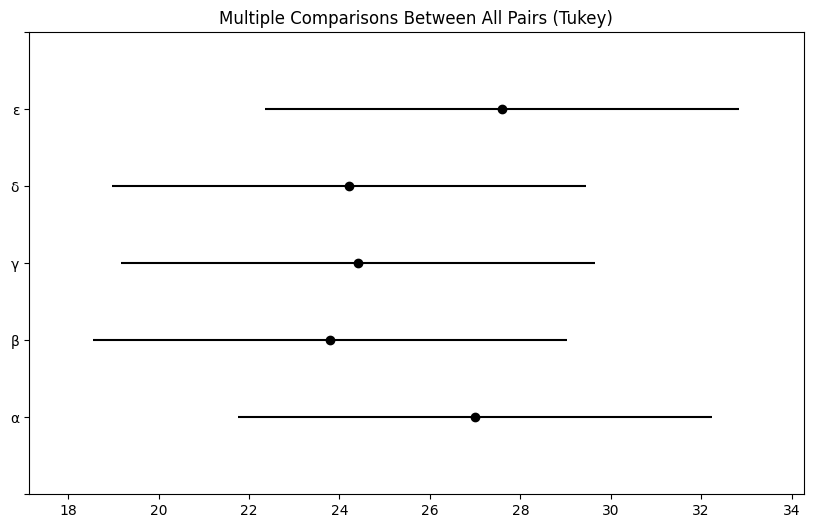

In [29]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

# Perform Tukey HSD test for 'Montaje'
tukey_montaje = pairwise_tukeyhsd(endog=df['Rapidez_Combustion'], groups=df['Montaje'], alpha=0.05)

# Display the results
print(tukey_montaje)

# Plot the results
tukey_montaje.plot_simultaneous()
plt.show()

[⬆️ Volver al inicio](#inicio)

<a name="T5"></a>
## **5. Validacion en R**

De acuerdo a los resultados anteriormente obtenidos en la prueba HSD Turkey, la mayoria de los pares de datos no presentan diferencias significativas, procedemos a validar con R

In [31]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Asegurar variables categóricas
df["Operador"] = df["Operador"].astype("category")
df["Lote"] = df["Lote"].astype("category")
df["Formulacion"] = df["Formulacion"].astype("category")
df["Montaje"] = df["Montaje"].astype("category")

# ANOVA con modelo lineal
anova_model = ols("Rapidez_Combustion ~ Operador + Lote + Formulacion + Montaje", data=df).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=2)
print(anova_table)

# Tukey HSD
print("Tukey HSD for Lote:")
print(pairwise_tukeyhsd(df["Rapidez_Combustion"], df["Lote"]))

print("Tukey HSD for Formulacion:")
print(pairwise_tukeyhsd(df["Rapidez_Combustion"], df["Formulacion"]))


             sum_sq   df          F    PR(>F)
Operador       68.0  4.0   2.060606  0.178311
Lote          150.0  4.0   4.545455  0.032930
Formulacion   330.0  4.0  10.000000  0.003344
Montaje        62.0  4.0   1.878788  0.207641
Residual       66.0  8.0        NaN       NaN
Tukey HSD for Lote:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     1      2      7.2 0.2129  -2.5056 16.9056  False
     1      3      2.8 0.9069  -6.9056 12.5056  False
     1      4      4.6 0.6236  -5.1056 14.3056  False
     1      5      5.4 0.4762  -4.3056 15.1056  False
     2      3     -4.4 0.6607 -14.1056  5.3056  False
     2      4     -2.6 0.9271 -12.3056  7.1056  False
     2      5     -1.8   0.98 -11.5056  7.9056  False
     3      4      1.8   0.98  -7.9056 11.5056  False
     3      5      2.6 0.9271  -7.1056 12.3056  False
     4      5      0.8 0.9991  -8.9056 10.5056  False
--

[⬆️ Volver al inicio](#inicio)

<a name="T6"></a>
## **6. Prueba de Homocedasticidad (Levene's Test)**

Para verificar el supuesto de homocedasticidad (igualdad de varianzas) para la variable de respuesta 'Rapidez_Combustion' a través de los niveles de cada factor, realizaremos la Prueba de Levene.

In [34]:
import scipy.stats as stats

# Perform Levene's test for each factor

# Levene's test for Operador
levene_operador = stats.levene(df['Rapidez_Combustion'][df['Operador'] == 1],
                               df['Rapidez_Combustion'][df['Operador'] == 2],
                               df['Rapidez_Combustion'][df['Operador'] == 3],
                               df['Rapidez_Combustion'][df['Operador'] == 4],
                               df['Rapidez_Combustion'][df['Operador'] == 5])
print(f"Levene's Test for Operador: Statistic = {levene_operador.statistic:.4f}, p-value = {levene_operador.pvalue:.4f}")

# Levene's test for Lote
levene_lote = stats.levene(df['Rapidez_Combustion'][df['Lote'] == 1],
                           df['Rapidez_Combustion'][df['Lote'] == 2],
                           df['Rapidez_Combustion'][df['Lote'] == 3],
                           df['Rapidez_Combustion'][df['Lote'] == 4],
                           df['Rapidez_Combustion'][df['Lote'] == 5])
print(f"Levene's Test for Lote: Statistic = {levene_lote.statistic:.4f}, p-value = {levene_lote.pvalue:.4f}")

# Levene's test for Formulacion
levene_formulacion = stats.levene(df['Rapidez_Combustion'][df['Formulacion'] == 'A'],
                                  df['Rapidez_Combustion'][df['Formulacion'] == 'B'],
                                  df['Rapidez_Combustion'][df['Formulacion'] == 'C'],
                                  df['Rapidez_Combustion'][df['Formulacion'] == 'D'],
                                  df['Rapidez_Combustion'][df['Formulacion'] == 'E'])
print(f"Levene's Test for Formulacion: Statistic = {levene_formulacion.statistic:.4f}, p-value = {levene_formulacion.pvalue:.4f}")

# Levene's test for Montaje
levene_montaje = stats.levene(df['Rapidez_Combustion'][df['Montaje'] == 'α'],
                              df['Rapidez_Combustion'][df['Montaje'] == 'β'],
                              df['Rapidez_Combustion'][df['Montaje'] == 'γ'],
                              df['Rapidez_Combustion'][df['Montaje'] == 'δ'],
                              df['Rapidez_Combustion'][df['Montaje'] == 'ε'])
print(f"Levene's Test for Montaje: Statistic = {levene_montaje.statistic:.4f}, p-value = {levene_montaje.pvalue:.4f}")

Levene's Test for Operador: Statistic = 0.8196, p-value = 0.5278
Levene's Test for Lote: Statistic = 0.7370, p-value = 0.5776
Levene's Test for Formulacion: Statistic = 0.5858, p-value = 0.6766
Levene's Test for Montaje: Statistic = 0.9394, p-value = 0.4615


## Interpretación de la Prueba de Homocedasticidad

En la Prueba de Levene, la hipótesis nula (H₀) es que las varianzas son iguales entre los grupos (homocedasticidad). La hipótesis alternativa (H₁) es que al menos una de las varianzas es diferente (heterocedasticidad).

*   Si el valor p es mayor que el nivel de significancia (comúnmente 0.05), no rechazamos H₀ y asumimos homocedasticidad.
*   Si el valor p es menor que el nivel de significancia (0.05), rechazamos H₀ y concluimos que hay heterocedasticidad.

Analizaremos los valores p obtenidos para cada factor después de ejecutar el código.

## Interpretación de los Resultados de la Prueba de Homocedasticidad

Analizando los valores p obtenidos de la Prueba de Levene:

*   **Operador:** El valor p es 0.5278. Como 0.5278 > 0.05, **asumimos homocedasticidad** para el factor Operador. No hay evidencia significativa para sugerir que las varianzas de la rapidez de combustión difieren entre los diferentes operadores.
*   **Lote:** El valor p es 0.5776. Como 0.5776 > 0.05, **asumimos homocedasticidad** para el factor Lote. No hay evidencia significativa para sugerir que las varianzas de la rapidez de combustión difieren entre los diferentes lotes.
*   **Formulacion:** El valor p es 0.6766. Como 0.6766 > 0.05, **asumimos homocedasticidad** para el factor Formulación. No hay evidencia significativa para sugerir que las varianzas de la rapidez de combustión difieren entre las diferentes formulaciones.
*   **Montaje:** El valor p es 0.4615. Como 0.4615 > 0.05, **asumimos homocedasticidad** para el factor Montaje. No hay evidencia significativa para sugerir que las varianzas de la rapidez de combustión difieren entre los diferentes montajes.

**Conclusión de la Homocedasticidad:**

Para todos los factores (Operador, Lote, Formulación y Montaje), el valor p de la Prueba de Levene es mayor que 0.05. Esto significa que **no rechazamos la hipótesis nula de igualdad de varianzas** para ninguno de estos factores. Por lo tanto, podemos asumir que se cumple el supuesto de homocedasticidad para la variable de respuesta 'Rapidez_Combustion' a través de los niveles de cada uno de los factores en este experimento. Esto valida el uso del ANOVA y las pruebas post-hoc como Tukey HSD, ya que asumen la igualdad de varianzas.

[⬆️ Volver al inicio](#inicio)


## Fin del Análisis

Este documento presenta el análisis del diseño en Cuadrado Grecolatino para investigar el efecto de diferentes formulaciones de carga propulsora en la rapidez de combustión, considerando los factores de bloqueo de Lote, Operador y Montaje.

Se realizó un Análisis de Varianza (ANOVA) para determinar la significancia estadística de cada factor y pruebas post-hoc (Tukey HSD) para identificar diferencias entre los niveles de los factores significativos. Además, se verificó el supuesto de homocedasticidad mediante la Prueba de Levene.

Para imprimir, revisa que todos los resultados y las interpretaciones estén completos y que la estructura con los títulos y subtítulos sea clara.